In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('data/viral_shorts_reels_performance_dataset.csv')

In [3]:
print(df.head())

  video_id  duration_sec  hook_strength_score       niche  views_first_hour  \
0    vid_1            16                 0.61  Motivation             10695   
1    vid_2            19                 0.34        Tech              1812   
2    vid_3            13                 0.47      Travel             23247   
3    vid_4            36                 0.21      Travel             11515   
4    vid_5             8                 0.75      Gaming             13474   

   views_total  retention_rate  first_3_sec_engagement   music_type  \
0       886048            0.85                    0.26  Viral Track   
1       198243            0.56                    0.80     Trending   
2       584171            0.14                    0.27     Trending   
3       491291            0.29                    0.81        Remix   
4       607425            0.27                    0.44  Viral Track   

  upload_time  
0  2024-02-09  
1  2024-04-17  
2  2024-01-01  
3  2024-04-01  
4  2024-01-15  


In [4]:
df.drop('video_id', axis=1, inplace=True)
print(df.head())

   duration_sec  hook_strength_score       niche  views_first_hour  \
0            16                 0.61  Motivation             10695   
1            19                 0.34        Tech              1812   
2            13                 0.47      Travel             23247   
3            36                 0.21      Travel             11515   
4             8                 0.75      Gaming             13474   

   views_total  retention_rate  first_3_sec_engagement   music_type  \
0       886048            0.85                    0.26  Viral Track   
1       198243            0.56                    0.80     Trending   
2       584171            0.14                    0.27     Trending   
3       491291            0.29                    0.81        Remix   
4       607425            0.27                    0.44  Viral Track   

  upload_time  
0  2024-02-09  
1  2024-04-17  
2  2024-01-01  
3  2024-04-01  
4  2024-01-15  


In [5]:
df.isna().sum()

duration_sec              0
hook_strength_score       0
niche                     0
views_first_hour          0
views_total               0
retention_rate            0
first_3_sec_engagement    0
music_type                0
upload_time               0
dtype: int64

In [6]:
print(df.duplicated().sum())

0


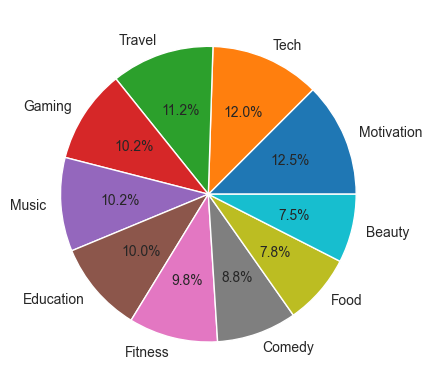

In [7]:
labels = df['niche'].unique()
fig, ax = plt.subplots()
ax.pie(x=df['niche'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()


In [8]:
df.describe()

,duration_sec,hook_strength_score,views_first_hour,views_total,retention_rate,first_3_sec_engagement
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,25.085000,0.584850,24730.51000,486338.497500,0.528275,0.617800
std,11.649552,0.229429,14180.99207,291672.505188,0.245214,0.230906
min,5.000000,0.200000,84.00000,1924.000000,0.100000,0.200000
25%,15.000000,0.390000,12497.00000,227904.500000,0.310000,0.420000
50%,26.000000,0.590000,24984.00000,473516.000000,0.530000,0.635000
75%,35.000000,0.770000,36222.25000,745058.750000,0.740000,0.820000
max,44.000000,1.000000,49812.00000,992963.000000,0.950000,0.990000


C:\Users\pioot\AppData\Local\Temp\ipykernel_14500\2465904193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='niche', y='views_total',palette='muted')


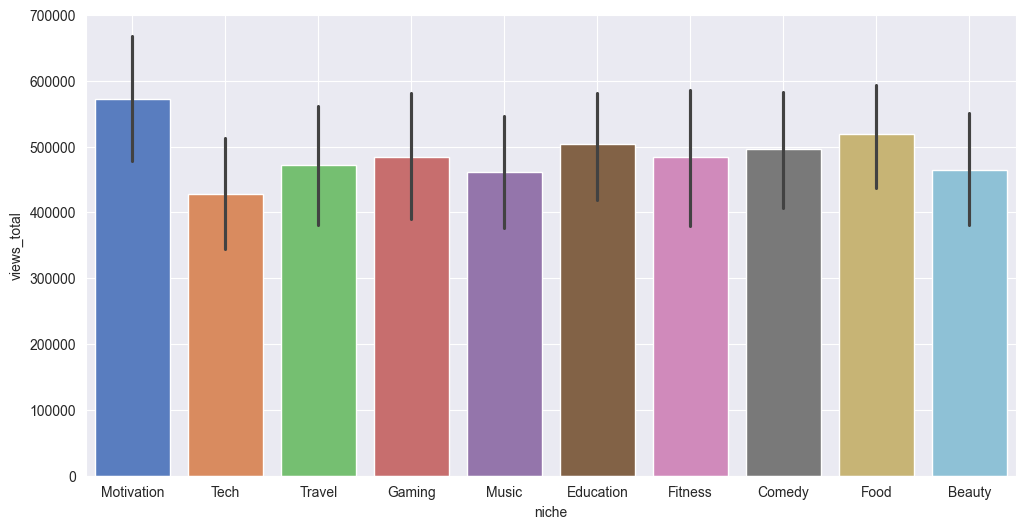

In [9]:
plt.figure(figsize = (12,6))

sns.barplot(data=df, x='niche', y='views_total',palette='muted')

plt.grid(True)
plt.show()

In [10]:
df["upload_time"] = pd.to_datetime(df['upload_time'])
df["upload_month"] = df['upload_time'].dt.month
print(df['upload_month'].value_counts())

upload_month
7     43
5     42
4     39
1     37
8     37
2     32
6     30
10    30
3     28
11    28
12    27
9     27
Name: count, dtype: int64


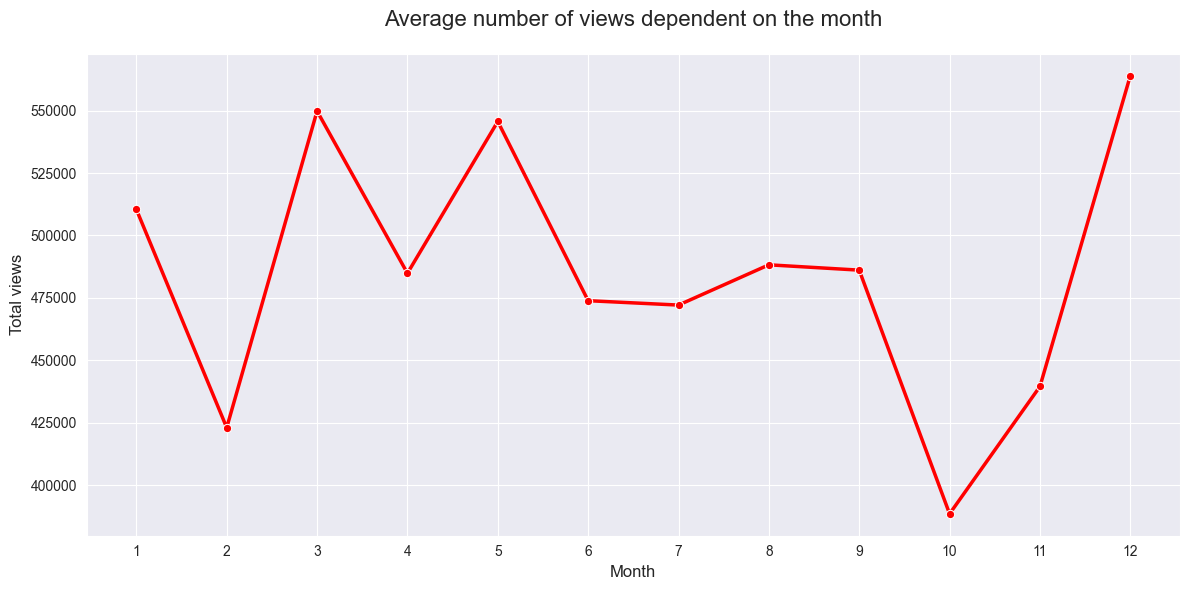

In [11]:
plt.figure(figsize=(12, 6))


sns.lineplot(
    data=df,
    x='upload_month',
    y='views_total',
    color='red',
    marker='o',
    linewidth=2.5,
    errorbar=None
)

plt.title('Average number of views dependent on the month', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total views', fontsize=12)

plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

In [12]:
df.head(
)

,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time,upload_month
0,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09,2
1,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17,4
2,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01,1
3,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01,4
4,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15,1


In [13]:
numeric_cols = df[["duration_sec", "hook_strength_score", "views_first_hour", "views_total", "retention_rate", "first_3_sec_engagement"]]
numeric_cols.corr()

,duration_sec,hook_strength_score,views_first_hour,views_total,retention_rate,first_3_sec_engagement
duration_sec,1.000000,0.036669,0.107365,-0.003928,0.014905,-0.006406
hook_strength_score,0.036669,1.000000,-0.005114,-0.037502,-0.022214,-0.092789
views_first_hour,0.107365,-0.005114,1.000000,0.035150,0.021453,0.027599
views_total,-0.003928,-0.037502,0.035150,1.000000,-0.083496,0.018191
retention_rate,0.014905,-0.022214,0.021453,-0.083496,1.000000,0.076217
first_3_sec_engagement,-0.006406,-0.092789,0.027599,0.018191,0.076217,1.000000


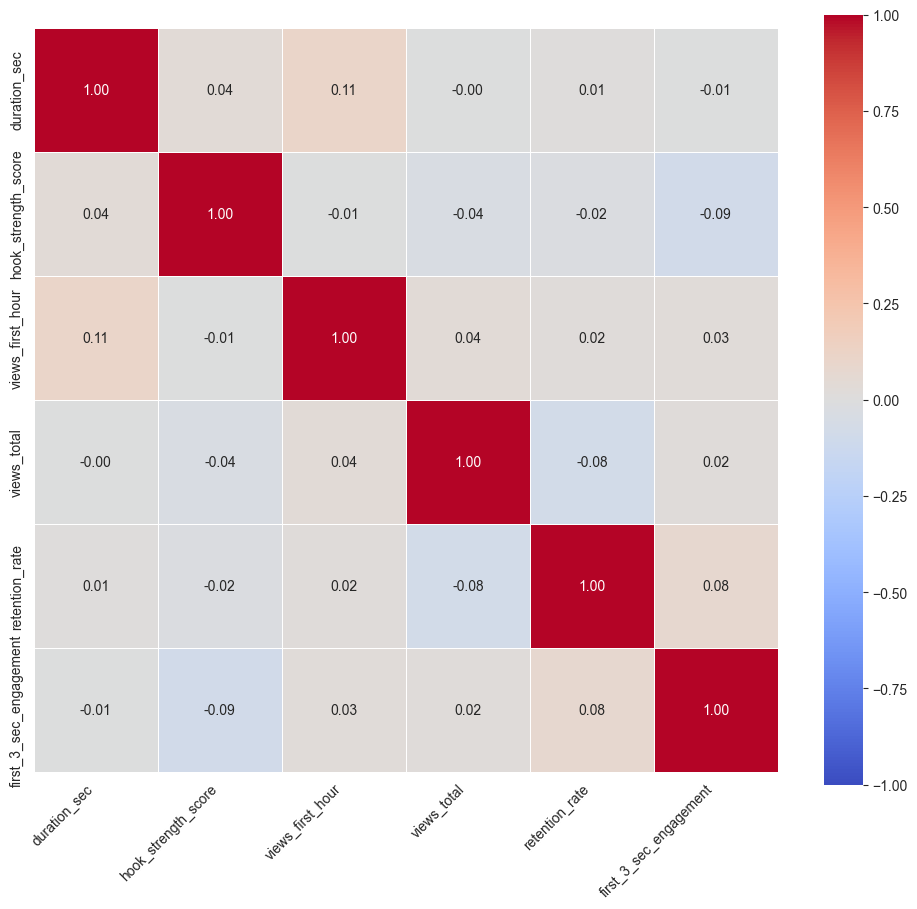

In [14]:
plt.figure(figsize=(12, 10))

corr = numeric_cols.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5,
    square=True
)

plt.xticks(rotation=45, ha='right') #
plt.show()

In [15]:
print(df.head(
))

   duration_sec  hook_strength_score       niche  views_first_hour  \
0            16                 0.61  Motivation             10695   
1            19                 0.34        Tech              1812   
2            13                 0.47      Travel             23247   
3            36                 0.21      Travel             11515   
4             8                 0.75      Gaming             13474   

   views_total  retention_rate  first_3_sec_engagement   music_type  \
0       886048            0.85                    0.26  Viral Track   
1       198243            0.56                    0.80     Trending   
2       584171            0.14                    0.27     Trending   
3       491291            0.29                    0.81        Remix   
4       607425            0.27                    0.44  Viral Track   

  upload_time  upload_month  
0  2024-02-09             2  
1  2024-04-17             4  
2  2024-01-01             1  
3  2024-04-01             4  
4 

In [16]:
df = pd.get_dummies(data=df, columns=["niche", "music_type"], drop_first=True)


In [17]:
cap = df["views_total"].quantile(0.75)
df["viral"] = (df["views_total"] > cap ).astype(int)
print(cap.round(3))

745058.75


In [64]:
print(df.head())
print(df['viral'].value_counts())

   duration_sec  hook_strength_score  views_first_hour  views_total  \
0            16                 0.61             10695       886048   
1            19                 0.34              1812       198243   
2            13                 0.47             23247       584171   
3            36                 0.21             11515       491291   
4             8                 0.75             13474       607425   

   retention_rate  first_3_sec_engagement upload_time  upload_month  \
0            0.85                    0.26  2024-02-09             2   
1            0.56                    0.80  2024-04-17             4   
2            0.14                    0.27  2024-01-01             1   
3            0.29                    0.81  2024-04-01             4   
4            0.27                    0.44  2024-01-15             1   

   niche_Comedy  niche_Education  ...  niche_Gaming  niche_Motivation  \
0         False            False  ...         False              True   


In [57]:
features = df.drop(columns=['viral', 'views_total', 'upload_time', 'upload_month', 'views_first_hour'])
target = df['viral']
X = features
y = target
print(X.std())

duration_sec              11.649552
hook_strength_score        0.229429
retention_rate             0.245214
first_3_sec_engagement     0.230906
niche_Comedy               0.297009
niche_Education            0.300376
niche_Fitness              0.303685
niche_Food                 0.331133
niche_Gaming               0.303685
niche_Motivation           0.263721
niche_Music                0.316376
niche_Tech                 0.325369
niche_Travel               0.267718
music_type_Original        0.413062
music_type_Remix           0.392792
music_type_Trending        0.411337
music_type_Viral Track     0.386740
dtype: float64


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
print(X.std())

1.0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
model = GradientBoostingClassifier(n_estimators=100, random_state=42, verbose=1, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1046            0.14s
         2           1.0862            0.14s
         3           1.0654            0.14s
         4           1.0419            0.15s
         5           1.0265            0.14s
         6           1.0085            0.14s
         7           0.9943            0.14s
         8           0.9824            0.14s
         9           0.9662            0.14s
        10           0.9528            0.14s
        20           0.8444            0.11s
        30           0.7531            0.09s
        40           0.6840            0.07s
        50           0.6212            0.06s
        60           0.5715            0.05s
        70           0.5339            0.04s
        80           0.4959            0.02s
        90           0.4587            0.01s
       100           0.4216            0.00s


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [61]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))




cm = confusion_matrix(y_test, y_pred)
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix',
                labels=dict(x="Predicted", y="Actual"),
                x=['Not Viral', 'Viral'], y=['Not Viral', 'Viral'],
                color_continuous_scale='RdBu', template='plotly_dark')
fig.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        60
           1       0.43      0.15      0.22        20

    accuracy                           0.74        80
   macro avg       0.60      0.54      0.53        80
weighted avg       0.68      0.74      0.69        80



                   Feature  Importance
3   first_3_sec_engagement    0.231640
1      hook_strength_score    0.200995
0             duration_sec    0.199955
2           retention_rate    0.160866
9         niche_Motivation    0.035360
15     music_type_Trending    0.031171
12            niche_Travel    0.029810
11              niche_Tech    0.020655
8             niche_Gaming    0.017425
14        music_type_Remix    0.012644
10             niche_Music    0.012132
4             niche_Comedy    0.010979
5          niche_Education    0.010338
6            niche_Fitness    0.009856
7               niche_Food    0.008526
16  music_type_Viral Track    0.006047
13     music_type_Original    0.001602


C:\Users\pioot\AppData\Local\Temp\ipykernel_14500\2172316790.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




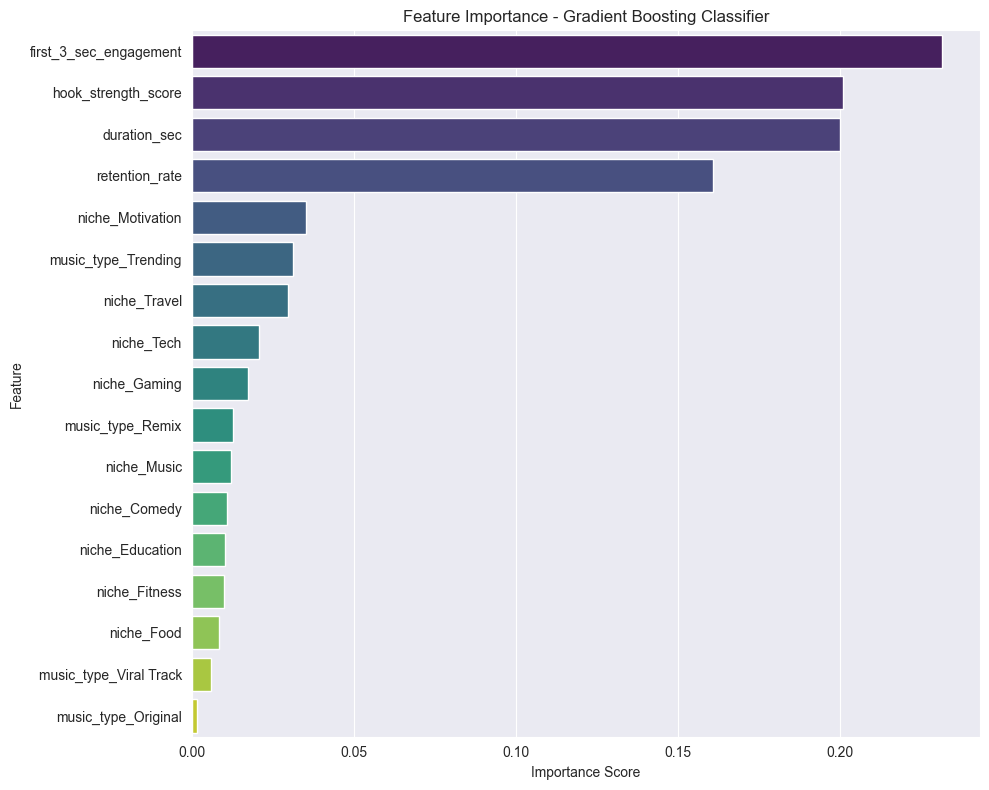

In [62]:
feature_names = features.columns.tolist()

importances = model.feature_importances_

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_imp_df)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()